# ECE-GY 6143 HW
## Guandong Kou (gk1675)

In [1]:
run styles.ipynb

## Problem 2

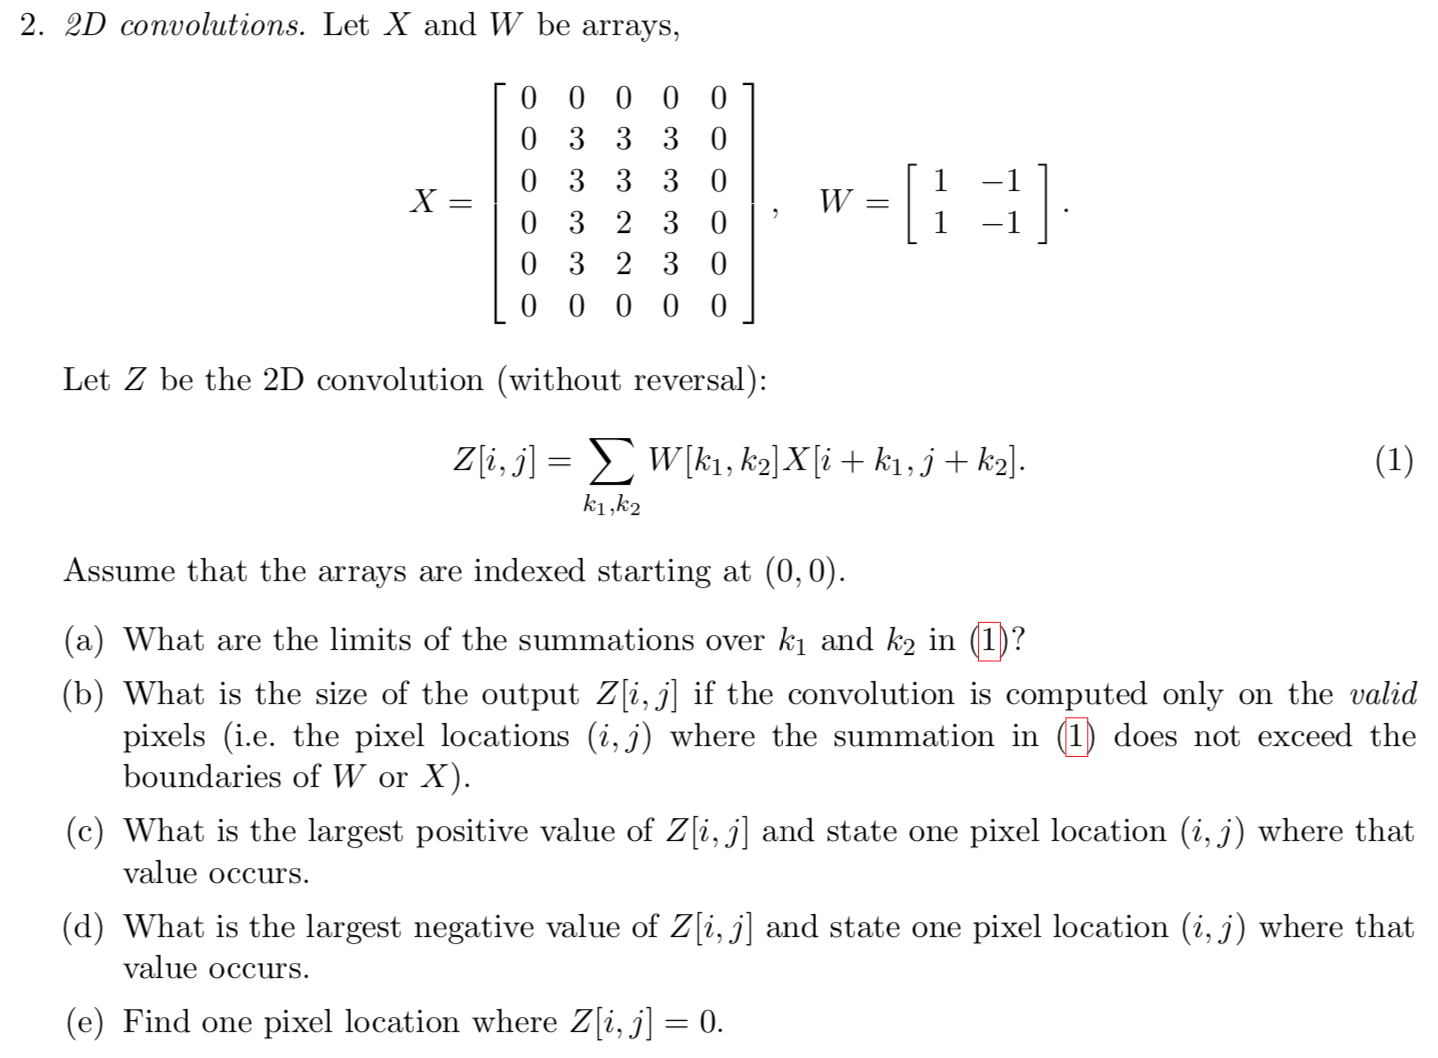

### 1a)

$$
0 \leq k_1 \leq 1 \\
0 \leq k_2 \leq 1
$$

### 1b)

X.shape = (6, 5)
$$
0 \leq i + k_1 \leq 5 \\
0 \leq j + k_2 \leq 4 \\
$$
$\Rightarrow$ Z.shape = (5, 4)

### 1c)

In [2]:
import numpy as np

In [3]:
X = np.array([
    [0,0,0,0,0],
    [0,3,3,3,0],
    [0,3,3,3,0],
    [0,3,2,3,0],
    [0,3,2,3,0],
    [0,0,0,0,0],
])
W = np.array([
    [1, -1],
    [1, -1]
])

In [4]:
from scipy.signal import convolve2d

In [5]:
Z = convolve2d(X, W[::-1, ::-1], mode='valid')
print(Z)

[[-3  0  0  3]
 [-6  0  0  6]
 [-6  1 -1  6]
 [-6  2 -2  6]
 [-3  1 -1  3]]


In [6]:
vmax = np.max(Z)
print(vmax)

6


In [7]:
np.unravel_index(Z.argmax(), Z.shape)

(1, 3)

### 1d)

In [8]:
vmin = np.min(Z)
print(vmin)

-6


In [9]:
np.unravel_index(Z.argmin(), Z.shape)

(1, 0)

### 1e)

In [10]:
np.argwhere(Z==0)[0]

array([0, 1])

## Problem 3

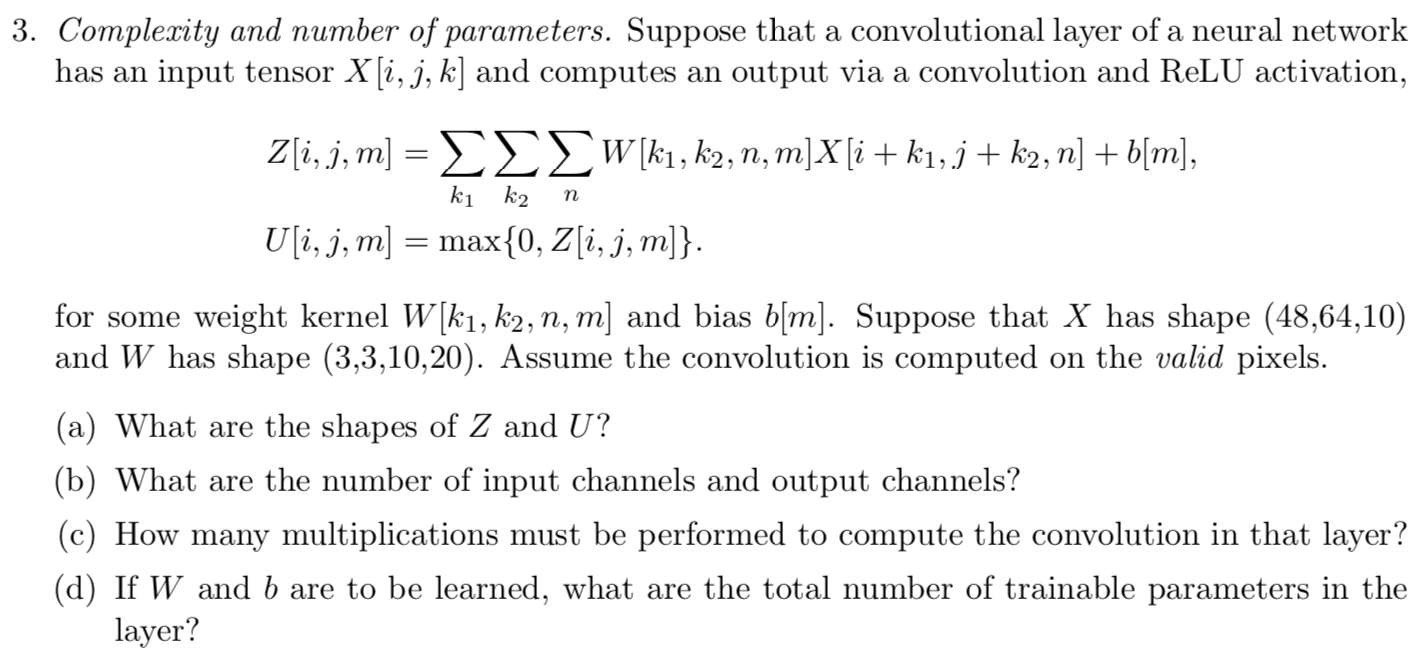

### 3a)

Z.shape = (46, 62, 20)  
U.shape = (46, 62, 20)

### 3b)

input channel: 10   
output channel: 20   

### 3c)

In [11]:
10*3*3*46*62*20

5133600

### 3d)

In [12]:
# W, b
10*3*3*20 + 20

1820

## Problem 4

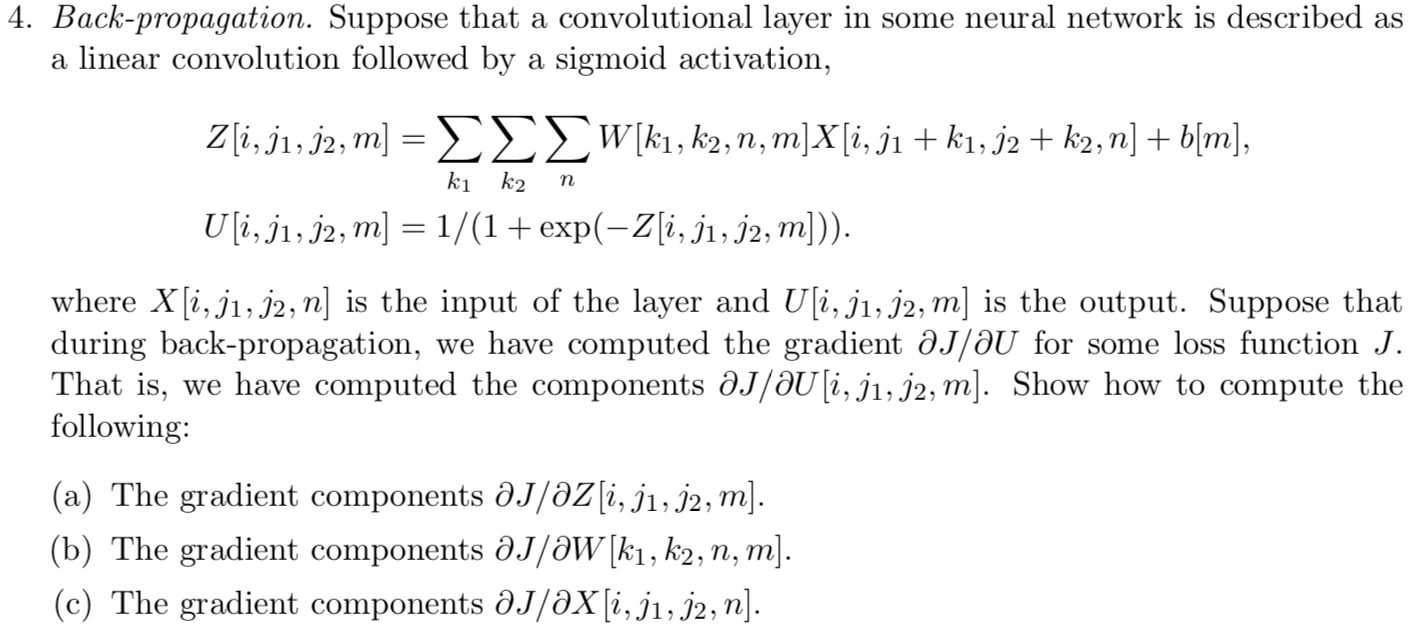

### 4a)

$$
\frac{\partial J}{\partial Z} = \frac{\partial J}{\partial U} \frac{\partial U}{\partial Z} \\
= \frac{\partial J}{\partial U} \frac{U}{1-U} \\
\Rightarrow
\frac{\partial J}{\partial Z[i, j_1, j_2, m]} = \frac{\partial J}{\partial U[i, j_1, j_2, m]} \frac{U[i, j_1, j_2, m]}{1-U[i, j_1, j_2, m]}
$$

### 4b)

$$
\frac{\partial J}{\partial W} = \frac{\partial J}{\partial U} \frac{\partial U}{\partial Z} \frac{\partial Z}{\partial W} \\
\Rightarrow
= \frac{\partial J}{\partial W[k_1, k_2, n, m]} = \frac{\partial J}{\partial U[i, j_1, j_2, m]} \frac{U[i, j_1, j_2, m]}{1-U[i, j_1, j_2, m]} \sum_{i}^{B} \sum_{j_1}^{N_1} \sum_{j_2}^{N_2} X[i,j_1+k_1, j_2+k_2, m]
$$

### 4c)

$$
\frac{\partial J}{\partial X} = \frac{\partial J}{\partial U} \frac{\partial U}{\partial Z} \frac{\partial Z}{\partial W} \frac{\partial W}{\partial X} \\
\Rightarrow
= \frac{\partial J}{\partial W[k_1, k_2, n, m]} = \frac{\partial J}{\partial U[i, j_1, j_2, m]} \frac{U[i, j_1, j_2, m]}{1-U[i, j_1, j_2, m]} \sum_{m=1}^{N_{out}} \sum_{k_1}^{K_1 - 1} \sum_{k_2}^{K_2 - 1} W[k_1, k_2, n, m]
$$

## Problem 5

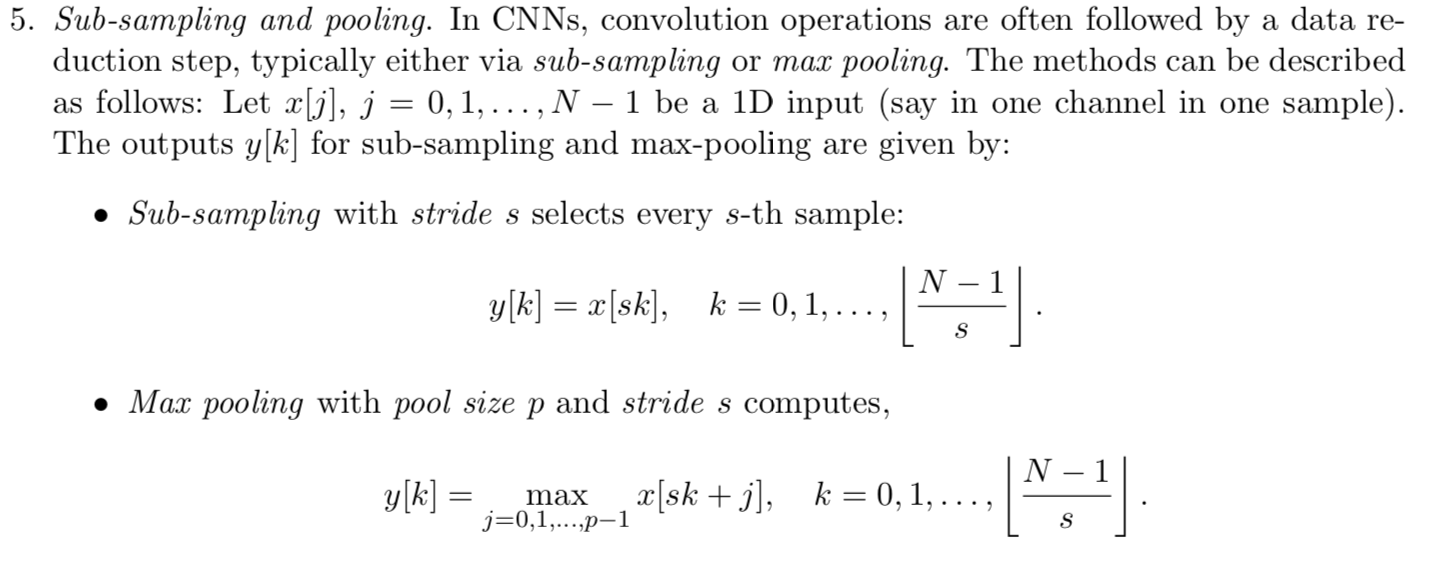

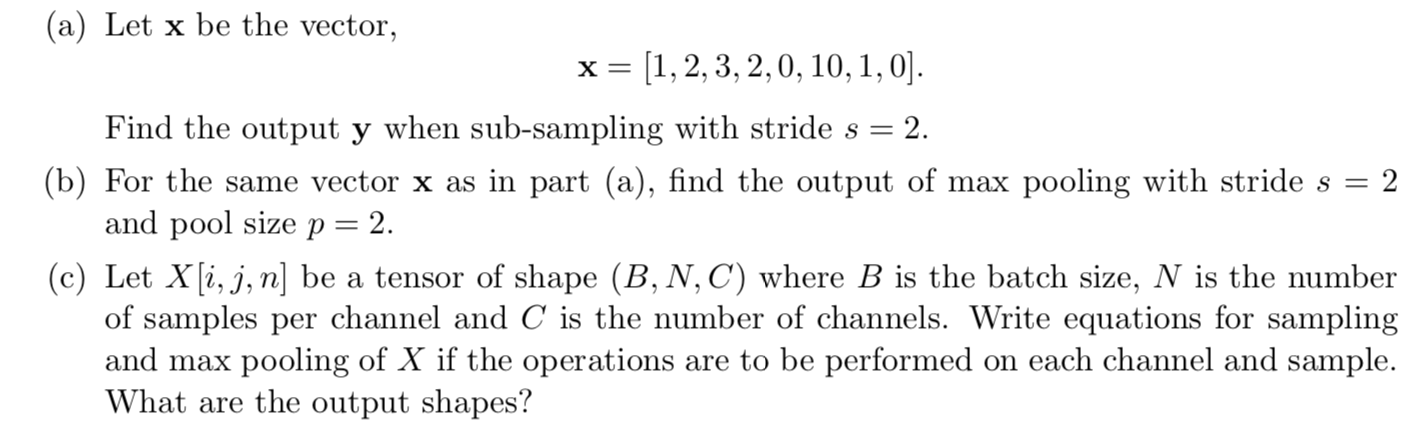

### 5a)

In [13]:
x = np.array([1,2,3,2,0,10,1,0])

stride = 2
y = x[::stride]
print(y)

[1 3 0 1]


### 5b)

In [14]:
pool_size = 2

output = [max(x[start:start + pool_size]) for start in range(0, len(x), stride)]
print(output)

[2, 3, 10, 1]


### 5c)

output size after sub-sampling is: [B, 1+floor((N-1)/s), C]

output size after max-pooling is the same as sub-sampling: [B, 1+floor((N-1)/s), C]

The souce code of this Jupyter Notebook will be uploaded to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_6143_Machine_Learning).